In [1]:
!pip3 install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.4 MB/

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
dataset_path = '/content/drive/MyDrive/HnM_bot/images/long_short_sleev_images/dataset'

In [4]:

img_height = 256
img_width = 256
batch_size = 32

In [5]:
# Function to count images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                count += 1
    return count


In [6]:

long_images_path = os.path.join(dataset_path, 'long_images')
short_images_path = os.path.join(dataset_path, 'short_images')

num_long_images = count_images(long_images_path)
num_short_images = count_images(short_images_path)

# minimum number of images in both folder
min_samples = min(num_long_images, num_short_images)


steps_per_epoch = min_samples // batch_size


In [7]:
num_long_images,num_short_images,min_samples,steps_per_epoch

(353, 634, 353, 11)

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    classes=['long_images', 'short_images'],
    interpolation='bilinear'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    classes=['long_images', 'short_images'],
    interpolation='bilinear'
)




Found 791 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [10]:

base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
25/25 [==============================] - 275s 11s/step - loss: 1.9368 - accuracy: 0.5727 - val_loss: 0.4718 - val_accuracy: 0.7449
Epoch 2/10
25/25 [==============================] - 21s 826ms/step - loss: 0.6008 - accuracy: 0.7004 - val_loss: 0.5117 - val_accuracy: 0.6990
Epoch 3/10
25/25 [==============================] - 21s 837ms/step - loss: 0.5161 - accuracy: 0.7358 - val_loss: 0.4178 - val_accuracy: 0.7908
Epoch 4/10
25/25 [==============================] - 22s 893ms/step - loss: 0.4390 - accuracy: 0.7965 - val_loss: 0.3658 - val_accuracy: 0.8622
Epoch 5/10
25/25 [==============================] - 23s 910ms/step - loss: 0.4337 - accuracy: 0.7889 - val_loss: 0.3456 - val_accuracy: 0.8520
Epoch 6/10
25/25 [==============================] - 21s 838ms/step - loss: 0.4128 - accuracy: 0.8205 - val_loss: 0.3615 - val_accuracy: 0.8367
Epoch 7/10
25/25 [==============================] - 22s 898ms/step - loss: 0.3784 - accuracy: 0.8230 - val_loss: 0.4552 - val_accuracy: 0.7806


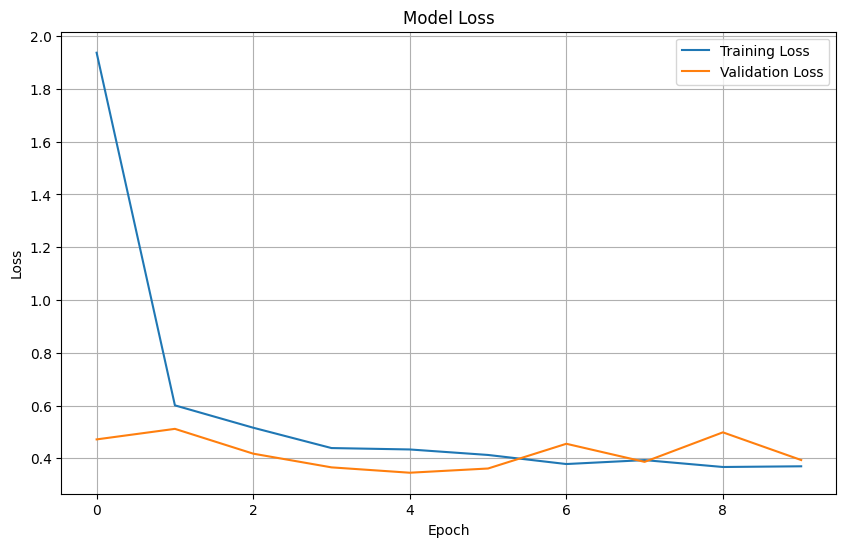

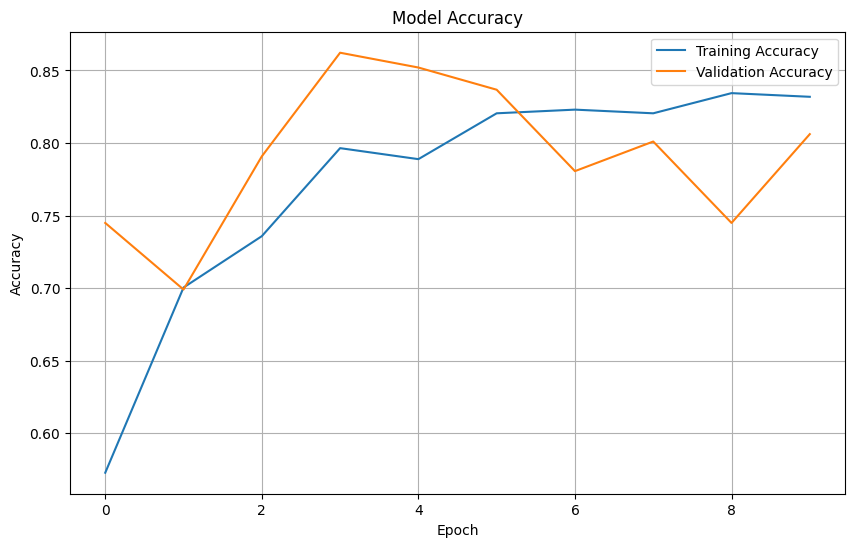

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [14]:

model.save('long_short_sleeve_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Assuming you have trained and saved your model
model.save('long_short_sleeve_model.h5')

# Define paths
source_file = 'long_short_sleeve_model.h5'
destination_folder = '/content/drive/MyDrive/HnM_bot/models'

# Copy model file to Google Drive
shutil.copy(source_file, destination_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/HnM_bot/models/long_short_sleeve_model.h5'

# Test by passing image path

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define paths and image dimensions
img_height = 256
img_width = 256
model_path = 'long_short_sleeve_model.h5'  # Replace with your model path

# Load your trained model
model = tf.keras.models.load_model(model_path)

# Define function to preprocess image and predict label
def classify_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch of size 1
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    # Predict the class probabilities for the input image
    predictions = model.predict(img_array)

    # Convert the prediction to class label
    predicted_label = 'short_images' if predictions[0][0] > 0.5 else 'long_images'
    confidence = predictions[0][0] if predicted_label == 'short_images' else 1 - predictions[0][0]

    return f"Predicted label: {predicted_label} (Confidence: {confidence:.4f})"

# Example usage:
img_path = "/content/drive/MyDrive/HnM_bot/images/long_short_sleev_images/dataset/short_images/image102.jpg"
result = classify_image(img_path)
print(result)

1/1 [==============================] - 1s 1s/step
Predicted label: short_images (Confidence: 0.9997)


# Gradio interface

In [16]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define paths and image dimensions
img_height = 256
img_width = 256

# Load your trained model
model = tf.keras.models.load_model(model_path)

# Define function to preprocess image and predict label
def classify_image(img):
    try:
        # Resize image to match model input dimensions
        img = img.resize((img_height, img_width))

        # Convert Gradio's PIL image to numpy array and preprocess
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)  # Expand dimensions to create batch of size 1
        img = img / 255.0  # Normalize pixel values to [0, 1]

        # Predict the class probabilities for the input image
        predictions = model.predict(img)

        # Convert the prediction to class label
        predicted_label = 'short_sleeve' if predictions[0][0] > 0.5 else 'long_sleeve'
        confidence = predictions[0][0] if predicted_label == 'short_sleeve' else 1 - predictions[0][0]

        return f"Predicted label: {predicted_label} (Confidence: {confidence:.4f})"

    except Exception as e:
        return f"Error: {str(e)}"

# Define Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs="text",
    title="Short and Long Classifier",
    description="Upload an image and classify whether it's a long sleeve or short sleeve based on the trained model.",
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://959130fd84b4e9f80a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
